<a href="https://colab.research.google.com/github/GinWeng/AI4E2024/blob/main/Assignmen_1_AI4E(Up%20to%20part%20II-%20Task%203).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Distance Functions

<details>
  <summary>Documentation: Euclidean Distance Calculation</summary>

  ### Study Progress Documentation: Euclidean Distance Function Development
  #### Date
  April 01, 2025

  #### Project Context
  This documentation pertains to a project task within the subject "Artificial Intelligence for Engineering." The task requires writing a Python function to calculate the Euclidean distance between two n-dimensional data points, contributing 0.25 points to the project grade. The function assumes that input vectors are of equal length, as specified in the project description.

  #### Concept Overview
  The Euclidean distance represents the straight-line distance between two points in n-dimensional space. It is a fundamental metric in fields such as machine learning and engineering, often used to measure similarity or dissimilarity between data points. Mathematically, for two n-dimensional vectors \( A = (a_1, a_2, ..., a_n) \) and \( B = (b_1, b_2, ..., b_n) \), the Euclidean distance is defined as:

  \[
  d_{Euclidean} = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2}
  \]

  This formula generalizes the Pythagorean theorem from two dimensions to any number of dimensions, computing the square root of the sum of squared differences between corresponding components.

  #### Development Process
  Our exploration began with the 2D case, where the distance between points \( A = (x_A, y_A) \) and \( B = (x_B, y_B) \) was expressed as:

  \[
  d_{Euclidean} = \sqrt{(x_A - x_B)^2 + (y_A - y_B)^2}
  \]

  Recognizing the pattern, we extended this to n dimensions, arriving at the generalized formula above. We then translated this into a Python implementation, iterating through several versions to optimize clarity and efficiency.

  #### Initial Python Implementation
  The first attempt used a manual loop to compute the sum of squared differences:
  ```python
  def d_euc(A, B):
      assert len(A) == len(B)  # Ensure vectors are of equal length
      distance = 0
      for i in range(len(A)):
          distance += (A[i] - B[i])**2
      return np.sqrt(distance)
  ```
  - **Strengths**: Intuitive and closely mirrors the mathematical formula.
  - **Considerations**: Assumes NumPy is available for `np.sqrt()` but lacks an explicit import. Input type flexibility (e.g., lists or arrays) was not explicitly handled.

  #### Refined Implementation
  To leverage NumPy’s efficiency and ensure robustness, we refined the function:
  ```python
  import numpy as np
  def d_euc(A, B):
      A = np.array(A)  # Convert inputs to NumPy arrays
      B = np.array(B)
      assert A.size == B.size  # Verify equal lengths
      distance = np.linalg.norm((A - B))  # Compute Euclidean norm
      return distance
  ```
  - **Key Improvements**:
    - Added `import numpy as np` for clarity and dependency transparency.
    - Converted inputs to NumPy arrays, ensuring compatibility with various input types (e.g., lists, tuples).
    - Replaced the loop with `np.linalg.norm()`, which computes the L2 (Euclidean) norm directly, eliminating the need for an additional `np.sqrt()`.
    - Used `A.size` instead of `len(A)` to align with NumPy array properties.

  #### How It Works
  - **Input**: Two vectors \( A \) and \( B \), each with n components (e.g., \( A = [1, 2, 3] \), \( B = [4, 5, 6] \)).
  - **Steps**:
    1. Convert \( A \) and \( B \) to NumPy arrays.
    2. Check that their sizes match using `assert A.size == B.size`.
    3. Compute the difference vector \( A - B \) (e.g., \( [1-4, 2-5, 3-6] = [-3, -3, -3] \)).
    4. Use `np.linalg.norm()` to calculate the Euclidean norm of the difference vector (e.g., \( \sqrt{(-3)^2 + (-3)^2 + (-3)^2} = \sqrt{27} \approx 5.196 \)).
    5. Return the result.

  #### Example
  For \( A = [1, 2, 3] \) and \( B = [4, 5, 6] \):
  - \( A - B = [-3, -3, -3] \)
  - \( d_{Euclidean} = \sqrt{(-3)^2 + (-3)^2 + (-3)^2} = \sqrt{9 + 9 + 9} = \sqrt{27} \approx 5.196 \)
  - Function output: `5.196152422706632`

  #### Final Notes
  This implementation is concise, efficient, and robust, leveraging NumPy for vectorized operations. It meets the project requirements by handling n-dimensional vectors of equal length and provides accurate Euclidean distance calculations. Potential further refinements could include eliminating the `distance` variable for brevity (e.g., `return np.linalg.norm(A - B)`), though the current form balances readability and functionality.

  ---
</details>

In [ ]:
# Euclidean Distance
import numpy as np
def d_euc(A, B):
    A = np.array(A)  # Convert inputs to NumPy arrays
    B = np.array(B)
    assert A.size == B.size  # Verify equal lengths
    distance = np.linalg.norm((A - B))  # Compute Euclidean norm
    return distance

<details>
  <summary> Manhattan Distance</summary>

  ### Study Progress Documentation: Manhattan Distance Function Development

  #### Date
  April 01, 2025

  #### Project Context
  This documentation relates to a project task within the subject "Artificial Intelligence for Engineering." The task requires writing a Python function to calculate the Manhattan distance between two n-dimensional data points, contributing 0.25 points to the project grade. The function assumes that input vectors are of equal length, as specified in the project description.

  #### Concept Overview
  The Manhattan distance, also known as the "taxicab distance" or L1 norm, measures the distance between two points in n-dimensional space by summing the absolute differences of their coordinates. Unlike Euclidean distance, which measures a straight line, Manhattan distance reflects travel along grid-like paths, as if moving only along the axes. For two n-dimensional vectors \( A = (a_1, a_2, ..., a_n) \) and \( B = (b_1, b_2, ..., b_n) \), the Manhattan distance is defined as:

  \[
  d_{Manhattan} = \sum_{i=1}^{n} |a_i - b_i|
  \]

  This metric is widely used in machine learning and data analysis, particularly when differences in individual dimensions are more meaningful than overall geometric distance.

  #### Development Process
  We started by imagining a grid-like city layout, where travel between points \( A = (1, 2) \) and \( B = (3, 5) \) occurs along horizontal and vertical paths. This led to the realization that the distance is the sum of absolute differences in each dimension, which we generalized to n dimensions. We then crafted a Python implementation, refining it for efficiency and clarity.

  #### Python Implementation
  The final implementation leverages NumPy for vectorized operations:
  ```python
  import numpy as np
  def d_manh(A, B):
      A = np.array(A)  # Convert inputs to NumPy arrays
      B = np.array(B)
      assert A.size == B.size  # Verify equal lengths
      distance = np.sum(np.abs(A - B))  # Sum absolute differences
      return distance
  ```
  - **Key Features**:
    - Explicitly imports `numpy` as `np` for transparency.
    - Converts inputs to NumPy arrays, ensuring flexibility with input types (e.g., lists, tuples).
    - Uses `A.size == B.size` to confirm equal vector lengths, consistent with the project’s assumption.
    - Employs `np.abs(A - B)` to compute absolute differences and `np.sum()` to add them, avoiding manual loops.
    - Retains the `distance` variable for improved readability, a deliberate choice for human understanding.

  #### How It Works
  - **Input**: Two vectors \( A \) and \( B \), each with n components (e.g., \( A = [1, 2] \), \( B = [3, 5] \)).
  - **Steps**:
    1. Convert \( A \) and \( B \) to NumPy arrays.
    2. Verify equal sizes with `assert A.size == B.size`.
    3. Compute the difference vector \( A - B \) (e.g., \( [1 - 3, 2 - 5] = [-2, -3] \)).
    4. Take absolute values: \( np.abs([-2, -3]) = [2, 3] \).
    5. Sum the absolute differences: \( np.sum([2, 3]) = 2 + 3 = 5 \).
    6. Return the result.

  #### Example
  For \( A = [1, 2] \) and \( B = [3, 5] \):
  - \( A - B = [-2, -3] \)
  - \( |A - B| = [2, 3] \)
  - \( d_{Manhattan} = 2 + 3 = 5 \)
  - Function output: `5`

  This result corresponds to moving 2 units in the x-direction (\( |1 - 3| \)) and 3 units in the y-direction (\( |2 - 5| \)), totaling 5 units along the grid.

  #### Validation
  The result aligns with the conceptual model of "taxicab" travel, where diagonal movement is not allowed. The absolute values ensure that distances in each dimension are treated as positive lengths, preventing cancellation of differences, which is a key distinction from Euclidean distance.

  #### Final Notes
  This implementation is efficient, readable, and robust, meeting the project requirements for n-dimensional vectors of equal length. The use of NumPy’s vectorized operations eliminates the need for explicit loops, while retaining `distance` enhances code clarity. A more concise version could omit `distance` (e.g., `return np.sum(np.abs(A - B))`)), but the current form prioritizes human understanding, as preferred.
</details>

In [ ]:
# Manhattan Distance
import numpy as np
def d_manh(A,B):
    A = np.array(A)  # Convert inputs to NumPy arrays
    B = np.array(B)
    assert A.size == B.size  # Verify equal lengths
    distance = np.sum(np.abs(A-B))
    return distance

<details>
  <summary>Cosine Distance</summary>
---

### Study Progress Documentation: Cosine Distance Function Development
**Date**: April 02, 2025  
**Collaborators**: User, Grok 3 (xAI)

#### Objective
Develop and refine a Python function `d_cos(A, B)` to compute the cosine distance between two vectors, ensuring robustness, clarity, and alignment with project requirements.

#### Initial Implementation
The starting point was your cosine distance function:
```python
import numpy as np
def d_cos(A, B):
    A = np.array(A)  # Convert inputs to NumPy arrays
    B = np.array(B)
    assert A.size == B.size  # Verify equal lengths
    assert np.linalg.norm(A) != 0 and np.linalg.norm(B) != 0, "Vectors cannot be zero vectors"
    sim_cos = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B)) # calculate the cosine similarity
    distance = 1 - sim_cos
    return distance
```
- **Purpose**: Compute \( d_{cos} = 1 - \cos(\theta) \), where \( \cos(\theta) = \frac{A \cdot B}{||A|| ||B||} \).
- **Range**: [0, 2] (0 for identical, 1 for perpendicular, 2 for opposite vectors).
- **Features**: Input validation, zero-vector check, NumPy optimization.

#### Key Discussion Points
1. **Input Handling**  
   - Converting inputs to NumPy arrays ensures flexibility (e.g., lists, tuples).  
   - `assert A.size == B.size` enforces equal vector lengths, a project assumption.  
   - **Outcome**: Retained as robust and appropriate.

2. **Zero-Vector Handling**  
   - Current: Raises an error if \( ||A|| = 0 \) or \( ||B|| = 0 \) to avoid division by zero.  
   - Alternatives Considered: Return `None`, `float('inf')`, or a default value (e.g., 1).  
   - **Rationale**: Error aligns with mathematical correctness and prevents ambiguous results.  
   - **Decision**: Kept the assertion, pending your final use-case confirmation.

3. **Cosine Similarity and Distance**  
   - Formula: \( \cos(\theta) = \frac{A \cdot B}{||A|| ||B||} \), \( d_{cos} = 1 - \cos(\theta) \).  
   - Implementation uses `np.dot()` and `np.linalg.norm()`, matching the mathematical definition.  
   - Range [0, 2] confirmed via tests. Alternative \( 1 - |\cos(\theta)| \) for [0, 1] was proposed.  
   - **Decision**: Retained [0, 2] range, awaiting your preference.

4. **Readability vs. Efficiency**  
   - Separate `sim_cos` variable enhances clarity.  
   - One-liner option: `return 1 - np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))`.  
   - **Outcome**: Kept separate variable for readability, with efficiency tweak below.

#### Testing
- **Same Direction**: \( [1, 2] \), \( [2, 4] \) → \( d_{cos} = 0 \) (✓).  
- **Perpendicular**: \( [1, 0] \), \( [0, 1] \) → \( d_{cos} = 1 \) (✓).  
- **Zero Vector**: \( [0, 0] \), \( [1, 2] \) → Error (✓).  
- **Opposite Direction**: \( [1, 0] \), \( [-1, 0] \) → \( d_{cos} = 2 \) (✓).  
- **Higher Dimension**: \( [1, 2, 3] \), \( [4, 5, 6] \) → \( d_{cos} \approx 0.027 \) (✓).  
- **Conclusion**: Function performs correctly across cases.

#### Refined Implementation
```python
import numpy as np
def d_cos(A, B):
    A = np.array(A)
    B = np.array(B)
    assert A.size == B.size, "Vectors must have equal lengths"
    norm_A, norm_B = np.linalg.norm(A), np.linalg.norm(B)
    assert norm_A != 0 and norm_B != 0, "Vectors cannot be zero vectors"
    sim_cos = np.dot(A, B) / (norm_A * norm_B)
    return 1 - sim_cos
```
- **Improvements**: Cached norms for minor efficiency; retained readability.  
- **Options**: Swap to `1 - abs(sim_cos)` for [0, 1] range if needed.

#### Open Questions for Future Reference
1. **Zero-Vector Behavior**: Confirm if error is preferred or if a default value suits your project.  
2. **Range**: Finalize [0, 2] vs. [0, 1] based on application (e.g., clustering, similarity scoring).  
3. **Additional Tests**: Consider negative vectors, sparse inputs, or larger datasets if relevant.

#### Next Steps
- Awaiting your feedback on open questions.  
- Potential: Add docstring, integrate into broader project, or test with real data.

#### Notes
Your work demonstrates a strong grasp of vector operations and NumPy usage. This function is ready for use or further customization as your project evolves. Feel free to revisit this with specific requirements or new test cases!


</details>

In [ ]:
# Cosine Distance
import numpy as np
def d_cos(A,B):
    A = np.array(A)  # Convert inputs to NumPy arrays
    B = np.array(B)
    assert A.size == B.size  # Verify equal lengths

    norm_A, norm_B = np.linalg.norm(A), np.linalg.norm(B)
    assert norm_A != 0 and norm_B != 0, "Vectors cannot be zero vectors"
      # check if the length(s) of vector(S) is (are) 0 to avoid 0 denominator

    sim_cos = np.dot(A, B) / (norm_A * norm_B) # calculate the cosine similarity
    distance = 1 - sim_cos
    return distance

<details>
  <summary>Hamming Distance</summary>


---

### Study Progress Documentation: Hamming Distance Function Development
**Date**: April 02, 2025  
**Collaborators**: User, Grok 3 (xAI)

#### Objective
Develop a Python function `d_ham(A, B)` to compute the Hamming distance between two binary strings, ensuring it counts positional differences accurately and enforces binary string constraints.

#### Initial Understanding
You described Hamming distance as “comparing two words digit by digit, only incrementing distance by one if there is any discrepancy,” and for vectors, “comparing difference instead of calculating the actual distance.” This led to your first draft:
```python
import numpy as np
def d_ham(A, B):
    A = np.array(A)  # Convert inputs to NumPy arrays
    B = np.array(B)
    assert A.size == B.size  # Verify equal lengths
    distance = np.sum(A != B)
    return distance
```
- **Intent**: Count mismatches between array elements.
- **Observation**: Works for arrays (e.g., `[1, 0]` vs. `[1, 1]`), but not directly for strings like `"101"` vs. `"110"`.

#### Key Discussion Points
1. **Scope Refinement**  
   - You clarified the function should handle *binary strings* (e.g., `"1010"`, `"1100"`), not general arrays or vectors.  
   - **Outcome**: Shifted focus to string inputs with '0' and '1' only.

2. **Input Handling**  
   - Initial code used NumPy arrays, but `np.array("101")` treats the string as a single element.  
   - Explored treating strings as character sequences (e.g., `['1', '0', '1']`).  
   - **Question**: How to ensure inputs are binary strings?

3. **Validation**  
   - Added checks for string type (`isinstance`) and binary content (`all(char in '01' for char in A)`).  
   - Kept equal-length requirement, as Hamming distance is undefined otherwise.  
   - **Outcome**: Strict input validation to match your binary string goal.

4. **Distance Calculation**  
   - Initial `np.sum(A != B)` worked for arrays but needed adaptation for strings.  
   - Proposed `sum(a != b for a, b in zip(A, B))` to compare characters directly.  
   - **Rationale**: Simple, Pythonic, and avoids NumPy for string-specific task.

#### Testing
- **Binary Strings**: `"1010"` vs. `"1100"`  
  - Pairs: `'1'='1'`, `'0'≠'1'`, `'1'≠'0'`, `'0'='0'` → Distance = 2 (✓).  
- **Identical**: `"111"` vs. `"111"` → Distance = 0 (✓).  
- **Unequal Lengths**: `"10"` vs. `"101"` → Assertion fails (✓).  
- **Non-Binary**: `"102"` vs. `"101"` → Assertion fails (✓).  
- **Conclusion**: Correctly counts mismatches for valid binary strings.

#### Final Implementation
```python
def d_ham(A, B):
    assert isinstance(A, str) and isinstance(B, str), "Inputs must be strings"
    assert all(char in '01' for char in A), "A must be a binary string"
    assert all(char in '01' for char in B), "B must be a binary string"
    assert len(A) == len(B), "Strings must have equal lengths"
    distance = sum(a != b for a, b in zip(A, B))
    return distance
```
- **Features**:  
  - Accepts binary strings (e.g., `"101"`, `"110"`).  
  - Validates string type and binary content.  
  - Computes distance as the number of differing positions.  
- **Design Choices**:  
  - Dropped NumPy for simplicity, as string operations didn’t need array overhead.  
  - Used `zip` for character-by-character comparison.

#### Alternatives Considered
- **NumPy Version**: Convert strings to arrays (e.g., `np.array(list(A))`) and use `np.sum(A != B)`.  
  - **Reason Not Chosen**: Less intuitive for strings, added complexity without benefit.  
- **Flexible Inputs**: Allow non-string inputs (e.g., lists) with conversion.  
  - **Reason Not Chosen**: Your focus was strictly binary strings.

#### Open Questions (Resolved)
1. **NumPy or Not?**: Opted for pure Python to match string focus.  
2. **Validation Strictness?**: Enforced binary strings with assertions, aligning with your intent.

#### Next Steps (If Revisited)
- Add docstring for clarity (e.g., “Computes Hamming distance between two binary strings”).  
- Test with larger binary strings or edge cases (e.g., empty strings, if defined).  
- Integrate into your project alongside `d_cos`.

#### Notes
Your grasp of Hamming distance as a positional difference metric was excellent from the start. Refining it for binary strings sharpened its purpose, making it a precise tool for your project. This is ready to use or adapt as needed—great work!

---

</details>

In [ ]:
import numpy as np

def d_ham(A,B):
    assert isinstance(A, str) and isinstance(B, str), "Inputs must be strings"
    # Check if both are binary (only 0s and 1s)
    assert all(char in '01' for char in A), "A must be a binary string"
    assert all(char in '01' for char in B), "B must be a binary string"
    # Check equal lengths
    assert len(A) == len(B), "Strings must have equal lengths"
    # Count differences
    distance = sum(a != b for a, b in zip(A, B))
    return distance

# Part II


# Assignment 1 - Part 2: Traffic Sign Classification with PyTorch
**MCEN90048 - Artificial Intelligence for Engineering, Semester 1, 2025**

This notebook implements a neural network classifier for the GTSRB dataset, covering data loading, preprocessing, model training, monitoring, and comparisons of gradient methods and learning rate schedules.

[Assignment 1 - Part 2 PDF instruction](https://canvas.lms.unimelb.edu.au/courses/215762/files/22530452?wrap=1)

In [ ]:
# install required package if running locally. Do not run this block if using something like Google Colab.
! pip install torch torchvision numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import random

# Set random seeds for reproducibility, comment this part out if you don't want it.
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


## 1. Load and Visualize the Dataset (1 point)



### Task 1: Load and Visualize the Dataset
Goal: Load the GTSRB dataset and display 10 random training images with their labels.

Load the Dataset:
Use `torchvision.datasets.GTSRB` access the dataset. It supports `split='train'` and `split='test'` and can download the data automatically.
For visualization, load the training set without transforms initially (since we’ll preprocess later):

In [5]:
# Load training dataset for visualization (no transforms yet)
train_dataset_vis = torchvision.datasets.GTSRB(
    root='./data', split='train', download=True, transform=None
)
print(f'Training set size: {len(train_dataset_vis)}')

100%|██████████| 187M/187M [00:11<00:00, 16.0MB/s]


Training set size: 26640


The `root='./data'` specifies where to store the dataset. Run this and confirm the download works.

### Task 2: Sample and Display Images:
Randomly pick 10 images and their labels, then plot them in a 2x5 grid

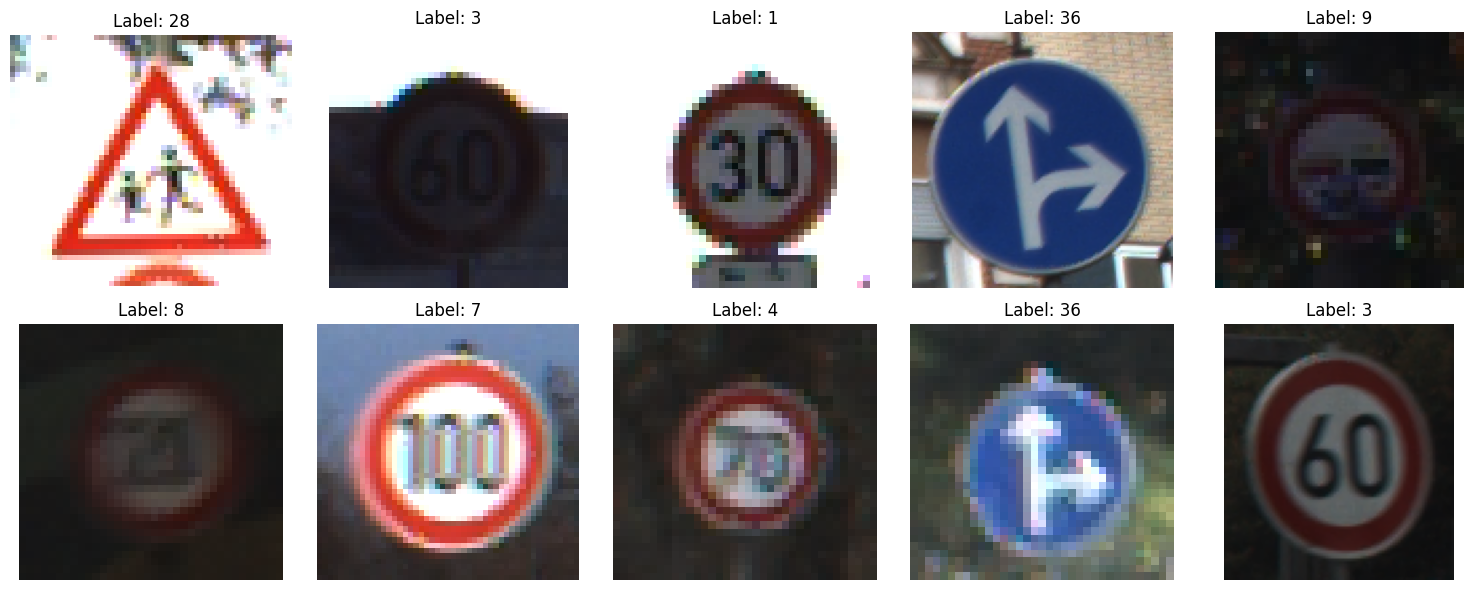

In [6]:
# Sample 10 random indices
indices = random.sample(range(len(train_dataset_vis)), 10)
images = [train_dataset_vis[i][0] for i in indices]  # PIL images
labels = [train_dataset_vis[i][1] for i in indices]  # Integer labels

# Plot images
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## 2. Pre-process Data

### Preprocess the Data
Images are resized to 64x64 and kept in RGB to preserve color details (e.g., red stop signs). Training data is augmented with random crops (from 80x80), 30° rotations, horizontal flips(got rid off for it could be incorrect for turn left and right), and color jitter to mimic real-world variations (lighting, angles). Normalized with ImageNet stats for stability.

In [24]:
import torchvision.transforms as transforms

# Training transforms with augmentation
train_transforms = transforms.Compose([
    transforms.Resize((80, 80)),  # Slightly larger for cropping
    transforms.RandomCrop((64, 64)),  # Crop to 64x64 after augmentation
    transforms.RandomRotation(30),  # Rotate up to 30 degrees
    #transforms.RandomHorizontalFlip(p=0.5),  # 50% chance of flipping, flipping might not making sense since it could turn left right around.
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Mimic lighting changes
    transforms.ToTensor(),  # Convert to tensor (RGB, [0, 1])
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize RGB
])

# Test transforms (no augmentation)
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),  # Direct to 64x64
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = torchvision.datasets.GTSRB(root='./data', split='train', download=True, transform=train_transforms)
test_dataset = torchvision.datasets.GTSRB(root='./data', split='test', download=True, transform=test_transforms)

# Data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f'Training batches: {len(train_loader)}')
print(f'Test batches: {len(test_loader)}')

Training batches: 417
Test batches: 198


### Testing and visualise preprosessed data (don't run if unnecessary):

In [25]:
# Inspect a batch
images, labels = next(iter(train_loader))
print(f'Batch shape: {images.shape}')  # Should be [64, 3, 64, 64]
print(f'Channels: {images.shape[1]}')  # 3 for RGB
print(f'Min/Max: {images.min():.2f}, {images.max():.2f}')  # Normalized range

Batch shape: torch.Size([64, 3, 64, 64])
Channels: 3
Min/Max: -2.12, 2.64


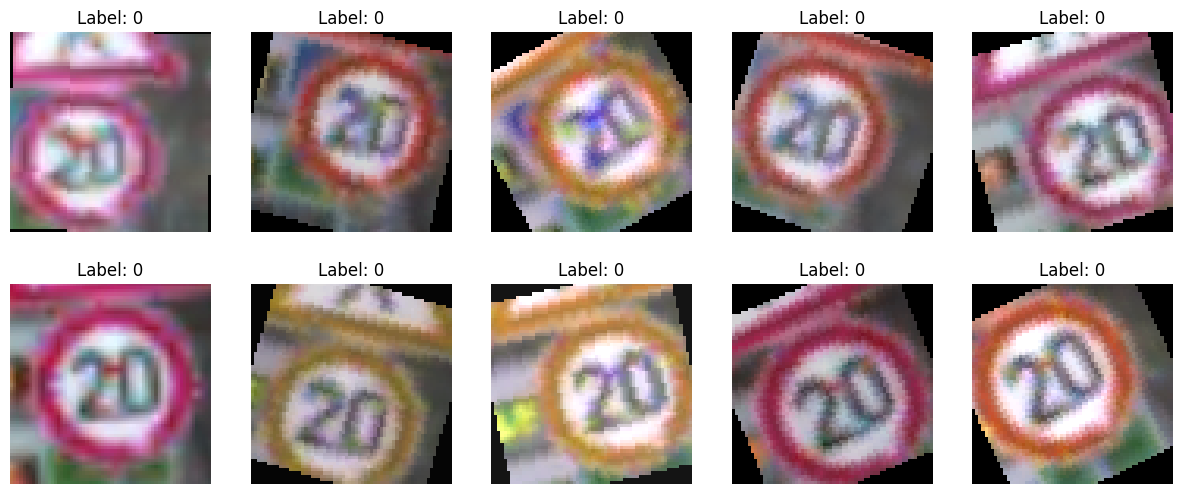

In [20]:
# Visualize augmented samples
plt.figure(figsize=(15, 6))
for i in range(10):
    img, lbl = train_dataset[i]  # Each call applies random transforms
    img = img.permute(1, 2, 0) * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Denormalize
    img = img.clamp(0, 1)  # Ensure [0, 1] for display
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.numpy())
    plt.title(f'Label: {lbl}')
    plt.axis('off')
plt.show()

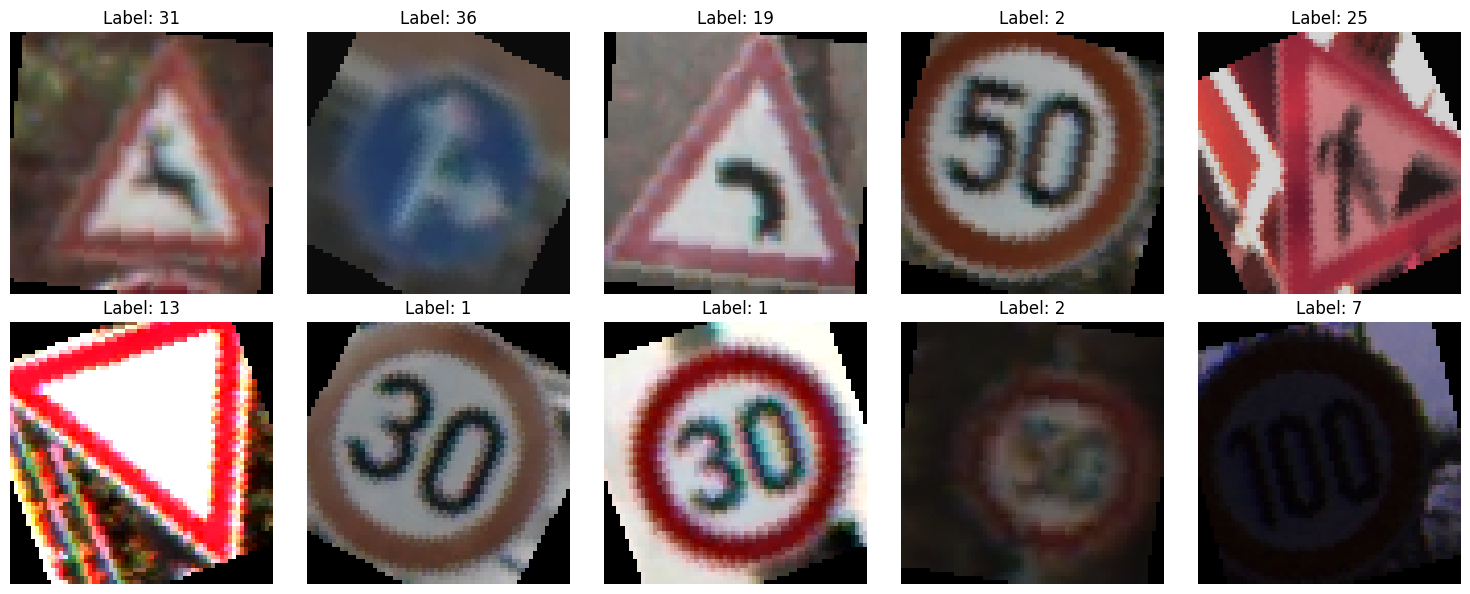

In [21]:
# Select 10 random indices
num_images = 10
random_indices = random.sample(range(len(train_dataset)), num_images)

# Visualize
plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    img, lbl = train_dataset[idx]  # Get augmented image
    img = img.permute(1, 2, 0) * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Denormalize
    img = img.clamp(0, 1)  # Ensure [0, 1]
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.numpy())
    plt.title(f'Label: {lbl}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Debugging Code blocks

#print(d_manh(A,B))
#print(d_euc(A,B))
#print(d_cos(A,B))
sample_image, sample_label = train_dataset_vis[2y]
print(f'Sample image size: {sample_image.size}')

Sample image size: (30, 30)


## 3 a. Train \& Test a Classification Model

In [26]:
import torch.nn as nn

class TrafficSignCNN(nn.Module):
    def __init__(self):
        super(TrafficSignCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # 3 input channels, 16 output channels
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 pooling
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        # Add more layers if you want
        self.fc1 = nn.Linear(32 * 16 * 16, 128)  # After pooling twice: 64 → 32 → 16
        self.fc2 = nn.Linear(128, 43)  # 43 classes
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # [batch, 16, 32, 32]
        x = self.pool(self.relu(self.conv2(x)))  # [batch, 32, 16, 16]
        x = x.view(-1, 32 * 16 * 16)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)  # No activation here—loss function handles it
        return x

# Initialize model
model = TrafficSignCNN().to(device)  # Move to GPU if available
print(model)

TrafficSignCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8192, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=43, bias=True)
  (relu): ReLU()
)


In [27]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # lr=0.01 to start

In [33]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()  # Training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            # Zero gradients
            optimizer.zero_grad()
            # Forward pass
            outputs = model(images)
            # Compute loss
            loss = criterion(outputs, labels)
            # Backward pass
            loss.backward()
            # Optimize
            optimizer.step()
            # Track loss and accuracy
            running_loss += loss.item() * images.size(0)
            predicted = outputs.argmax(dim=1)  # Get class predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, '
              f'Accuracy: {100 * correct / total:.2f}%')
    print('Training finished')
    return model

# Train
model = train_model(model, train_loader, criterion, optimizer, num_epochs=10)

Epoch 1, Loss: 160.8740, Accuracy: 27.24%
Epoch 2, Loss: 105.4351, Accuracy: 47.79%
Epoch 3, Loss: 79.6649, Accuracy: 59.17%
Epoch 4, Loss: 63.0569, Accuracy: 67.91%
Epoch 5, Loss: 50.7808, Accuracy: 74.11%
Epoch 6, Loss: 42.7975, Accuracy: 78.40%
Epoch 7, Loss: 35.6870, Accuracy: 81.78%
Epoch 8, Loss: 31.3413, Accuracy: 84.14%
Epoch 9, Loss: 27.9331, Accuracy: 85.85%
Epoch 10, Loss: 25.6054, Accuracy: 87.04%
Training finished


## 3 b: The Expected Accuracy

In [34]:
def test_model(model, test_loader):
    model.eval()  # Evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No gradients needed
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predicted = outputs.argmax(dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

# Test
test_accuracy = test_model(model, test_loader)

Test Accuracy: 71.28%


## 4. Monitor the Training Process

## 5 a. Comparison of Different Gradient Methods

## 5 b. Comparison of Different Learning Rate Schedules.

In [ ]:
A= "1234"
print(list(A))

['1', '2', '3', '4']
